
<div style="direction:rtl; text-align:right">

# هل تستطيع توقع تصنيف الأعداد

<div style="direction:rtl; text-align:right">
.  سنتعمق في أساسيات بناء النماذج ولفعل ذلك سنقوم باستخدام بيانات الأعداد لتصنيف الأعداد من 0 إلى 9 بناء على الصور فقط! سنقوم في هذا المشروع بالعمل على بيانات كاقل التالية: 

- https://www.kaggle.com/c/digit-recognizer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<div style="direction:rtl; text-align:right">

# قراءة البيانات

<div style="direction:rtl; text-align:right">
سنقوم أولاً بقراءة البيانات. كما ذكرنا، البيانات عبارة عن صور 28 x 28 بكسل. بالتالي نتوقع أن نرى 28 * 28 = 784 عمود. كل عمود يحوي على قيمة البكسل.

In [2]:
train_data = pd.read_csv('digit-recognizer/train.csv')

<div style="direction:rtl; text-align:right">
لنر كيف تبدو الأعمدة:

In [3]:
train_data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

<div style="direction:rtl; text-align:right">
وهنا نقوم بذات الأمر مع بيانات الاختبار:

In [4]:
test_data = pd.read_csv('digit-recognizer/test.csv')

In [5]:
test_data.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

<div style="direction:rtl; text-align:right">
سنقوم الآن بعزل المتغير الذي يحتوي على تصنيف العدد وذلك لاستخدامه لاحقاً في نمذجة البيانات:

In [6]:
y = train_data['label']

In [7]:
train_data.drop(columns='label', inplace=True)

<div style="direction:rtl; text-align:right">
لدينا 70000 مثال و 784 متغير تنبؤ. متغيرات التنبؤ هنا ليست سوى قيم البكسلات في صور الأرقام المكتوبة (28 pixel x 28 pixel). لاستعراض بعض الأمثلة سنقوم باستخدام الأمر التالي:

In [8]:
def show_examples(data, y):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4,i+1)
        select = np.random.randint(data.shape[0])
        plt.imshow(data.values[select,:].reshape(28,28), interpolation='nearest', cmap='gray')
        plt.title('Label: ' + str(y.values[select]))
        plt.axis('off')

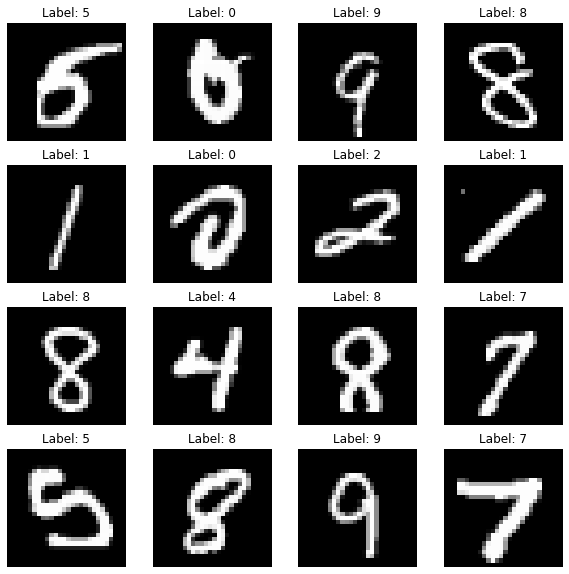

In [9]:
show_examples(train_data, y)

<div style="direction:rtl; text-align:right">

# تجهيز البيانات

<div style="direction:rtl; text-align:right">
في البداية، لايوجد أمامنا الكثير لنعمله في تجهيز البيانات سوى خطوة قد تكون مهمة لبعض النماذج: وهي تسوية البيانات. في تسوية البيانات، نقوم بكل بساطة بجعل كل الأعمدة بنفس المستوى بما يمكننا من المقارنة بين مختلف الأعمدة. هناك العديد من الطرق لتسوية البيانات ولكن سنقوم هنا باستخدام أسهل الطرق وهي بقسمة كل عمود على أكبر قيمة، وذلك لجعل البيانات بين 0 و 1. 

In [15]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################

def scale_data(data):
    scaled=data/data.max()
    return scaled


In [16]:
train_data_scaled = scale_data(train_data)


<div style="direction:rtl; text-align:right">
إذا عملت الخطوات بشكل صحيح، فسنرى الكثير من القيم المفقودة (NaN) ولكن في الحقيقة هذه ليست قيم مفقودة بل أرقام غير معرفة جراء قسمة مجموعة من الأصفار على صفر. لذلك، سنقوم باستبدال كل قيمة مفقودة (NaN) بالرقم 0.

In [17]:


train_data_scaled.fillna(0, inplace=True)

<div style="direction:rtl; text-align:right">
سنطبق الآن التسوية على بيانات الاختبار.

In [18]:
test_data_scaled = scale_data(test_data)

<div style="direction:rtl; text-align:right">
ونستبدل القيم المفقودة بالرقم 0 كما فعلنا مع بيانات التدريب.

In [19]:


test_data_scaled.fillna(0, inplace=True)

In [20]:
assert np.max(np.max(train_data_scaled)) == 1., 'You got something wrong!'

<div style="direction:rtl; text-align:right">
سنقوم برسم البيانات قبل التسوية و بعدها لنلاحظ الفرق بينها، أدناه رسم البيانات قبل التسوية

Text(0, 0.5, 'Frequency')

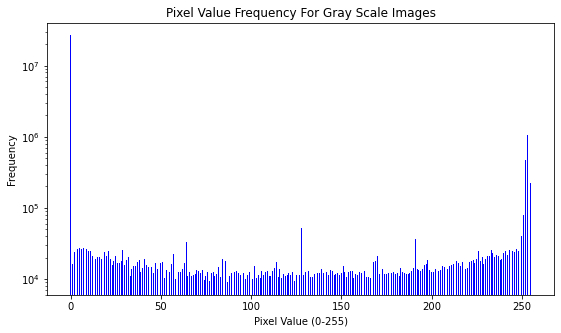

In [21]:
# سنستخدم المتغير train_data
y1 = pd.value_counts(train_data.values.ravel()).sort_index()
x1 = y1.index
width = 0.5
plt.figure(figsize=[20,5])
ax1 = plt.subplot(1, 2, 1)
ax1.bar(x1, y1, width, color="blue")
plt.title('Pixel Value Frequency For Gray Scale Images')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

<div style="direction:rtl; text-align:right">
قم برسم البيانات بعد التسوية لنلاحظ الفرق بين البيانات قبل وبعد التسوية، استخدم مقاسًا مناسبًا لقيمة عرض العمود
(width)
بحيث تكون القيم ما بين 0.01 إلى 0.0001، جربها واختر عرضًا مناسبًا
ولا تنسى تغيير عنوان الرسم البياني ليكون
Pixel Value Frequency For Gray Scale Images After Scalling
ولاحظ أن قيم المحور السيني ستتراوح ما بين 0 إلى 1 وعليه سنقوم بتغيير عنوان المحور السيني ليكون
Pixel Value (0-1)

Text(0, 0.5, 'Frequency')

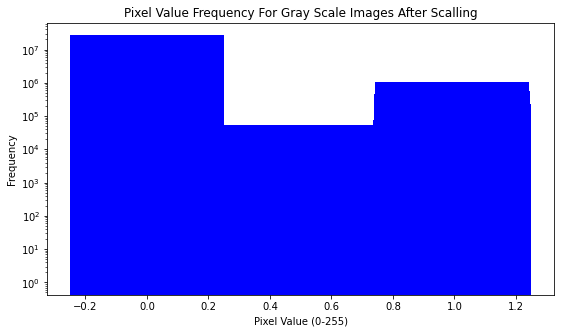

In [23]:

# استخدم المتغير train_data_scaled
y1 = pd.value_counts(train_data_scaled.values.ravel()).sort_index()
x1 = y1.index
width = 0.5
plt.figure(figsize=[20,5])
ax1 = plt.subplot(1, 2, 1)
ax1.bar(x1, y1, width, color="blue")
plt.title('Pixel Value Frequency For Gray Scale Images After Scalling')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

<div style="direction:rtl; text-align:right">

# نمذجة البيانات

<div style="direction:rtl; text-align:right">
سنقوم الآن بنمذجة البيانات باستخدام عدة نماذج ونرى كيف يمكن أن نحسن من أداء النموذج. تحديدا، سنقوم بتدريب النموذج باستخدام البيانات الخام (training_data) ثم باستخدام البيانات بعد التسوية (training_data_scaled) ونقارن بين النتيجتين لنعرف إن كان للتسوية أي دور في تحسين أداء النموذج. لنبدأ باستخدام الانحدار اللوجستي. في الخانة أدناه، قم باستيراد كلاً من مكتبة الخوارزمية وأمر cross_val_score ثم استخدمهم في تدريب النموذج والتحقق من صحته.

In [31]:


# HINT: You should use `train_data` as your input

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

model1 = MultinomialNB()
model1.fit(train_data,y)
scores = cross_val_score(model1, train_data, y, cv=3)

<div style="direction:rtl; text-align:right">
الآن سنقوم بطباعة متوسط الدقة:

In [32]:
scores.mean()

0.8252380952380953

<div style="direction:rtl; text-align:right">
الآن سنكرر نفس العملية ولكن باستخدام نموذج آخر من اختيارك. ابحث عن نموذج تصنيفي (classification model) من ضمن مكتبات scikit-learn وقم باستخدامه في تصنيف الأعداد. ملاحظة: تستطيع استخدام train_data_scaled بدلاً من البيانات الخام وتقارن أداء النماذج المختلفة.

In [33]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model2 = LogisticRegression()
model2.fit(train_data_scaled,y)
scores =  cross_val_score(model2, train_data_scaled, y, cv=3)
scores.mean()

C:\Users\KRM0201517\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\KRM0201517\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

0.9162857142857144

<div style="direction:rtl; text-align:right">
هل تلاحظ أي فرق في الدقة؟

<div style="direction:rtl; text-align:right">
لنقم بمقارنة مصفوفة الالتباس للحالتين ونرى هل يرتكب النموذجين ذات الأخطاء؟

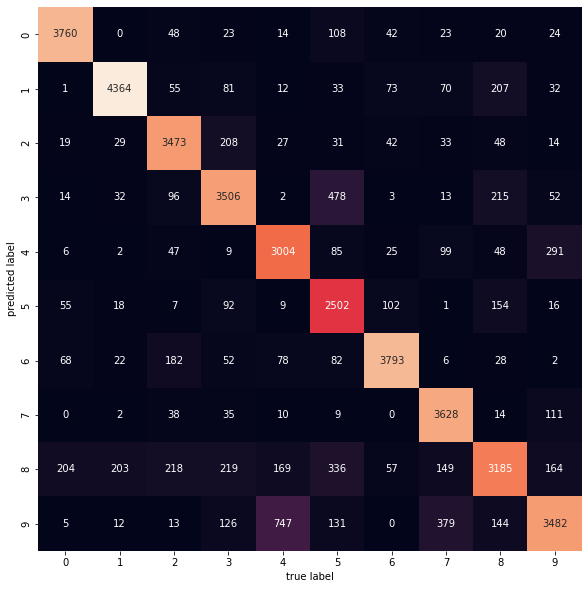

In [34]:
# confusion matrix 1

model1.fit(train_data, y)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y, model1.predict(train_data))

plt.figure(figsize=(10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

<div style="direction:rtl; text-align:right">
لا تنسى أن تستعمل بيانات التدريب بعد التسوية في حال أنك استعملتها لتدريب النموذج الثاني.

C:\Users\KRM0201517\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


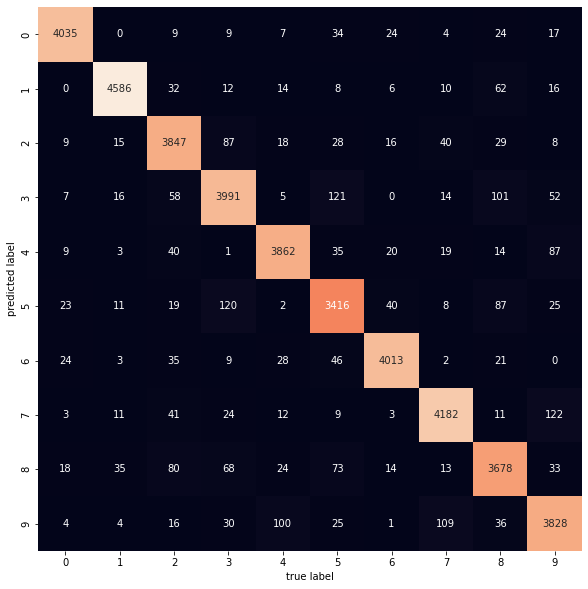

In [36]:

# confusion matrix 2

model2.fit(train_data_scaled, y)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y, model2.predict(train_data_scaled))

plt.figure(figsize=(10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [37]:
model1.fit(train_data, y) # training model on full data

MultinomialNB()

In [38]:
test_data['Label'] = model1.predict(test_data)

In [39]:
test_data.index.name = 'ImageId'

In [40]:
test_data.index = test_data.index +1

In [41]:
test_data['Label'].to_csv('./digits_submission.csv', header=True)